In [40]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# from pandas_datareader import data as pdr
# Can be used for collecting other data. 

In [41]:
# Variables
EndPoint = dt.datetime.now() 
YearsToFetch = 10
StartPoint = 365 * YearsToFetch

In [42]:
tickers = ["AAPL", "QQQ", "MSFT", "TSLA", "SPY"]
# tickers = ["SPY"]

In [43]:
EndDate = EndPoint
StartDate = EndDate - dt.timedelta(days=StartPoint)
EndDate, StartDate


(datetime.datetime(2025, 11, 8, 22, 32, 4, 528442),
 datetime.datetime(2015, 11, 11, 22, 32, 4, 528442))

In [44]:
# yf.pdr_override()
df = yf.download(tickers, StartDate, EndDate)
# df.head()

C:\Users\nicol\AppData\Local\Temp\ipykernel_11020\4120167265.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, StartDate, EndDate)
[*********************100%***********************]  5 of 5 completed


In [45]:
df = df["Close"]
# df.head()

In [46]:
log_returns = np.log(df / df.shift(1).dropna())
percent_returns = df.pct_change().dropna()
percent_returns.head()

Ticker,AAPL,MSFT,QQQ,SPY,TSLA
Date,,,,,
2015-11-13,-0.029208,-0.009002,-0.019636,-0.011228,-0.027003
2015-11-16,0.016379,0.017600,0.014384,0.015207,0.034365
2015-11-17,-0.004292,-0.008238,0.000628,-0.000729,-0.001446
2015-11-18,0.031665,0.016613,0.019195,0.015866,0.033037
2015-11-19,0.012704,0.001672,0.000704,-0.000862,0.003302


In [ ]:
cum_returns = percent_returns.cumsum()
cum_returns.head()

<Axes: title={'center': 'Stock Returns Over Time'}, xlabel='Date'>

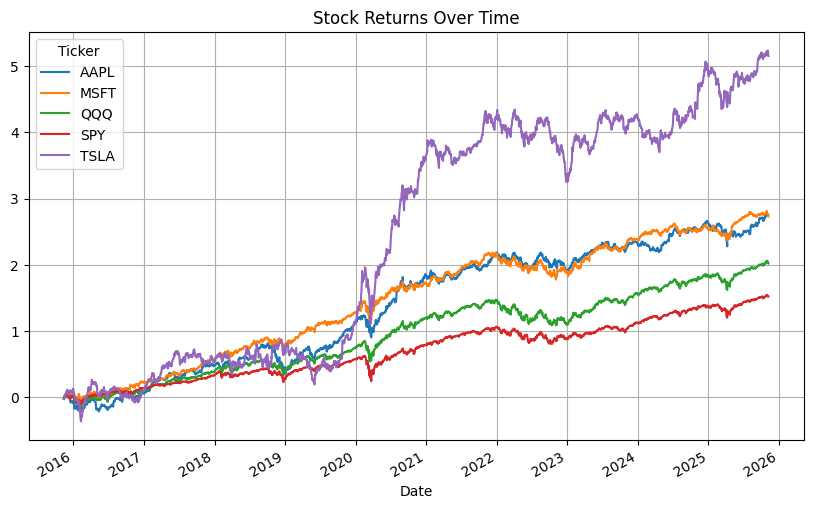

In [48]:
cum_returns.plot(figsize=(10,6), title="Stock Returns Over Time", grid=True)